# Práctica IV - Algoritmos Genéticos

_Pareja 6_
* David Kaack Sánchez
* Carlos César Rodríguez García

## Setup

### Importaciones

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utilerias as utils # Funciones que ayudan al procesado de datos y la creación de tablas para analizarlos.

from ClasificadorKNN import ClasificadorKNN
from ClusteringKMeans import ClusteringKMeans
from Datos import Datos
from EstrategiaParticionado import ValidacionCruzada
from ScikitClasificadorKNN import ScikitClasificadorKNN
from ScikitClusteringKMeans import ScikitClusteringKMeans

## Apartado 1 - Detalles de Implementación

### a) Mecanismo de cruce implementado

### b) Mecanismo de mutación implementado

## Apartado 2 - Resultados de la Clasificación para los dos conjuntos de prueba

* indicar con qué generacion se obtiene el mejor resultado
* incluir porcentaje de acirto o error, reglas correspondientes al mejor individuo e interpretación del significado de las reglas


## descripcion de memoria
1. crear clasificadores con configuraciones distintas de tamanio de poblacion y de numero de generaciones
2. almacenar los resultados en una tabla e imprimirla
3. graficar el error de cada uno de los clasificadores
4. seleccionar el mejor clasificador 

### Clasificación dataset Titanic

In [89]:
from Datos import Datos
from EstrategiaParticionado import ValidacionSimple

from importlib import reload
import AlgoritmoGenetico as a
from EstrategiaCruce import CruceInterReglas, CruceIntraReglas
from EstrategiaMutacion import MutacionEstandar

datos_titanic = Datos("titanic.csv")
validacion_simple = ValidacionSimple(numeroEjecuciones=1, proporcionTest=30)

clasificador = a.AlgoritmoGenetico(
    tamano_poblacion=50,
    n_generaciones=10,
    max_reglas=5,
    porcentaje_elitismo=0.05,
    probabilidad_mutacion=0.05,
    cruces=[CruceInterReglas(), CruceIntraReglas()],
    mutaciones=[MutacionEstandar()],
    verbose=True
)

clasificador.validacion(validacion_simple, datos_titanic, clasificador)

Nueva poblacion, mejor: 0.417462482946794, promedio: 0.13388813096862212
Nueva poblacion, mejor: 0.49113233287858116, promedio: 0.2392087312414734
Nueva poblacion, mejor: 0.5989085948158254, promedio: 0.3362892223738062
Nueva poblacion, mejor: 0.5989085948158254, promedio: 0.35991814461118676
Nueva poblacion, mejor: 0.5989085948158254, promedio: 0.3390723055934516
Nueva poblacion, mejor: 0.5989085948158254, promedio: 0.3828649386084585
Nueva poblacion, mejor: 0.6125511596180082, promedio: 0.38384720327421545
Nueva poblacion, mejor: 0.6125511596180082, promedio: 0.33888130968622093
Nueva poblacion, mejor: 0.6125511596180082, promedio: 0.3395088676671215
Nueva poblacion, mejor: 0.6125511596180082, promedio: 0.34848567530695773


(0.3386581469648562, 0.0)

In [68]:
mejor_individuo = clasificador.mejor_generacion().mejor_individuo()

reglas = mejor_individuo.reglas
reglas_como_texto = clasificador.representacion_condicional(mejor_individuo)

for i in range(len(reglas)):
    print(f"Regla {i+1}: {reglas[i]}\n")
    print(f"{reglas_como_texto[i]}\n")
    print("-----------------------------------------------------------------\n")

Regla 1: [1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0]

IF 	(Pclass == 1) OR (Pclass == 2) OR (Pclass == 3)
	 AND (Sex == 0) OR (Sex == 1)
	 AND (Age == 0) OR (Age == 10) OR (Age == 11) OR (Age == 14) OR (Age == 2) OR (Age == 3) OR (Age == 4) OR (Age == 5) OR (Age == 7) OR (Age == 8) OR (Age == 9)
THEN Class == 0

-----------------------------------------------------------------

Regla 2: [0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1]

IF 	(Pclass == 3)
	 AND (Age == 1) OR (Age == 11) OR (Age == 2) OR (Age == 3) OR (Age == 4) OR (Age == 7) OR (Age == 8) OR (Age == 9)
	 AND (Class == 0)
THEN Class == 1

-----------------------------------------------------------------

Regla 3: [0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0]

IF 	(Pclass == 3)
	 AND (Sex == 0) OR (Sex == 1)
	 AND (Age == 1) OR (Age == 11) OR (Age == 14) OR (Age == 2) OR (Age == 4) OR (Age == 5) OR (Age == 7) OR (Age == 9)
THEN Class == 0

-----------------------------------------------------------------

Regla 4: [1 1 1 0 

## Apartado 3 - Análisis de resultados
* importancia del numero de reglas
* tamanio de la poblacion y generaciones

## Apartado 4 - Evolución de forma gráfica
a) fitness del mejor individuo de la población
b) fitness medio de la población

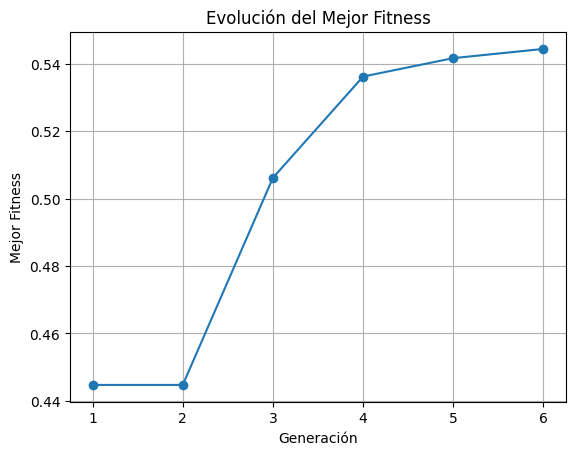

In [71]:
# Grafica fitness del mejor individuo de la poblacion
import matplotlib.pyplot as plt
generaciones = clasificador.generaciones()
mejores_fitness = [generacion.mejor_fitness() for generacion in generaciones]

plt.plot(list(range(1, len(generaciones) + 1)), mejores_fitness, marker='o')
plt.title('Evolución del Mejor Fitness')
plt.xlabel('Generación')
plt.ylabel('Mejor Fitness')
plt.grid(True)
plt.show()

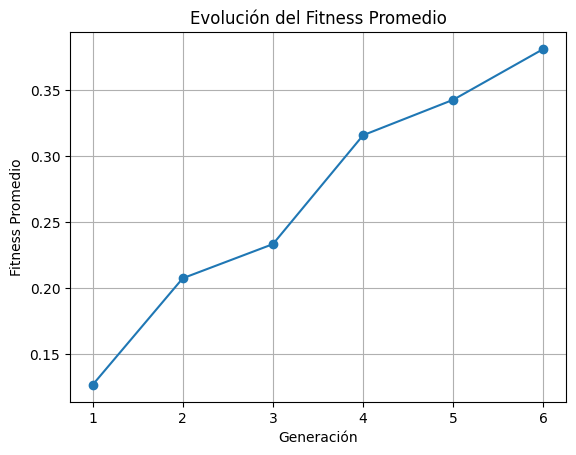

In [73]:
fitness_promedio = [generacion.promedio_fitness() for generacion in generaciones]

plt.plot(list(range(1, len(generaciones) + 1)), fitness_promedio, marker='o')
plt.title('Evolución del Fitness Promedio')
plt.xlabel('Generación')
plt.ylabel('Fitness Promedio')
plt.grid(True)
plt.show()

In [48]:
mejor_individuo.reglas

array([[1, 0, 1, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 1]])

In [20]:
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2
